In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import acquire
import prepare as prep
import model as mod
import model1 as mod1

Work with titanic data to do the following:

In [63]:
titanic = prep.prep_titanic()
titanic

csv file found and loaded


,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,0,0,30.0000,C,1,1,0,0


In [64]:
df = prep.split_data(titanic, 'survived')
df

(     passenger_id  survived  pclass     sex  sibsp  parch      fare embarked  \
 455           455         1       3    male      0      0    7.8958        C   
 380           380         1       1  female      0      0  227.5250        C   
 492           492         0       1    male      0      0   30.5000        S   
 55             55         1       1    male      0      0   35.5000        S   
 243           243         0       3    male      0      0    7.1250        S   
 ..            ...       ...     ...     ...    ...    ...       ...      ...   
 695           695         0       2    male      0      0   13.5000        S   
 128           128         1       3  female      1      1   22.3583        C   
 636           636         0       3    male      0      0    7.9250        S   
 222           222         0       3    male      0      0    8.0500        S   
 496           496         1       1  female      1      0   78.2667        C   
 
      alone  sex_male  emb

In [65]:
train,validate,test = df
train

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,0,2,male,0,0,13.5000,S,1,1,0,1
128,128,1,3,female,1,1,22.3583,C,0,0,0,0
636,636,0,3,male,0,0,7.9250,S,1,1,0,1
222,222,0,3,male,0,0,8.0500,S,1,1,0,1


In [66]:
train = train.drop(columns=['sex'])
validate = validate.drop(columns=['sex'])
test = test.drop(columns=['sex'])
train

,passenger_id,survived,pclass,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,0,0,7.8958,C,1,1,0,0
380,380,1,1,0,0,227.5250,C,1,0,0,0
492,492,0,1,0,0,30.5000,S,1,1,0,1
55,55,1,1,0,0,35.5000,S,1,1,0,1
243,243,0,3,0,0,7.1250,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
695,695,0,2,0,0,13.5000,S,1,1,0,1
128,128,1,3,1,1,22.3583,C,0,0,0,0
636,636,0,3,0,0,7.9250,S,1,1,0,1
222,222,0,3,0,0,8.0500,S,1,1,0,1


In [67]:
train = train.drop(columns=['embarked'])
validate = validate.drop(columns=['embarked'])
test = test.drop(columns=['embarked'])
train

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0
492,492,0,1,0,0,30.5000,1,1,0,1
55,55,1,1,0,0,35.5000,1,1,0,1
243,243,0,3,0,0,7.1250,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
695,695,0,2,0,0,13.5000,1,1,0,1
128,128,1,3,1,1,22.3583,0,0,0,0
636,636,0,3,0,0,7.9250,1,1,0,1
222,222,0,3,0,0,8.0500,1,1,0,1


In [68]:
train.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0
492,492,0,1,0,0,30.5000,1,1,0,1
55,55,1,1,0,0,35.5000,1,1,0,1
243,243,0,3,0,0,7.1250,1,1,0,1


In [69]:
X_train = train.iloc[:,2:]
X_train


,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1
...,...,...,...,...,...,...,...,...
695,2,0,0,13.5000,1,1,0,1
128,3,1,1,22.3583,0,0,0,0
636,3,0,0,7.9250,1,1,0,1
222,3,0,0,8.0500,1,1,0,1


In [70]:
X_validate = validate.iloc[:,2:]
X_validate


,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
176,3,3,1,25.4667,0,1,0,1
372,3,0,0,8.0500,1,1,0,1
678,3,1,6,46.9000,0,0,0,1
778,3,0,0,7.7375,1,1,1,0
463,2,0,0,13.0000,1,1,0,1
...,...,...,...,...,...,...,...,...
622,3,1,1,15.7417,0,1,0,0
302,3,0,0,0.0000,1,1,0,1
518,2,1,0,26.0000,0,0,0,1
765,1,1,0,77.9583,0,0,0,1


In [71]:
X_test = test.iloc[:,2:]
X_test

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
561,3,0,0,7.8958,1,1,0,1
641,1,0,0,69.3000,1,0,0,0
400,3,0,0,7.9250,1,1,0,1
498,1,1,2,151.5500,0,0,0,1
875,3,0,0,7.2250,1,0,0,0
...,...,...,...,...,...,...,...,...
339,1,0,0,35.5000,1,1,0,1
841,2,0,0,10.5000,1,1,0,1
442,3,1,0,7.7750,0,1,0,1
815,1,0,0,0.0000,1,1,0,1


In [72]:
target = 'survived'

In [73]:
y_train = train[target]
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [74]:
y_validate = validate[target]
y_validate

176    0
372    0
678    0
778    0
463    0
      ..
622    1
302    0
518    1
765    1
837    0
Name: survived, Length: 178, dtype: int64

In [75]:
y_test = test[target]
y_test

561    0
641    1
400    1
498    0
875    1
      ..
339    0
841    0
442    0
815    0
53     1
Name: survived, Length: 179, dtype: int64

In [76]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [77]:
(train.survived == 0).mean()

0.6161048689138576

In [78]:
(y_train == 0).mean()


0.6161048689138576

Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [79]:
rf = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10)
rf

RandomForestClassifier(max_depth=10)

In [80]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [81]:
rf.predict(X_train)

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [82]:
rf.predict_proba(X_train)[:5]

array([[0.73792007, 0.26207993],
       [0.        , 1.        ],
       [0.55565647, 0.44434353],
       [0.3286727 , 0.6713273 ],
       [0.99264974, 0.00735026]])

In [83]:
rf.score(X_train, y_train)

0.9438202247191011

Evaluate your results using the model score, confusion matrix, and classification report.



In [84]:
rf.score(X_train, y_train)

0.9438202247191011

In [85]:
y_pred = rf.predict(X_train)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [86]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[324,   5],
       [ 25, 180]])

In [87]:
labels = sorted(y_train.unique())
labels

[0, 1]

In [88]:
pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,324,5
1_actual,25,180


In [89]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       329
           1       0.97      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.94      0.94       534



Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [90]:
# Survived = positive
TP = 180
TN = 324
FP = 5
FN = 25

acc = (TP+TN)/(TP+TN+FP+FN)
total = (TP+TN+FP+FN)
true_positive_rate = TP/(total)
false_positive_rate = FP/(total)
true_negative_rate = TN/(total)
false_negative_rate = FN/(total)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = (2 * (precision * recall) / (precision + recall))
support_pos = FN + TP
support_neg = TN + FP

print('acc =',acc)
print('true positive rate =',true_positive_rate) 
print('true negative rate =', true_negative_rate)
print('false positive rate =', false_positive_rate)
print('false negative rate =', false_negative_rate)
print('precision =',precision)
print('recall =',recall)
print('f1 score =', f1_score)
print('positive support =', support_pos)
print('negative support =', support_neg)

acc = 0.9438202247191011
true positive rate = 0.33707865168539325
true negative rate = 0.6067415730337079
false positive rate = 0.009363295880149813
false negative rate = 0.04681647940074907
precision = 0.972972972972973
recall = 0.8780487804878049
f1 score = 0.923076923076923
positive support = 205
negative support = 329


Run through steps increasing your min_samples_leaf and decreasing your max_depth

In [91]:
rf = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9419475655430711

In [92]:
rf1 = RandomForestClassifier(min_samples_leaf = 2, max_depth = 9)
rf1.fit(X_train, y_train)
rf1.score(X_train, y_train)

0.8913857677902621

In [93]:
rf2 = RandomForestClassifier(min_samples_leaf = 3, max_depth = 8)
rf2.fit(X_train, y_train)
rf2.score(X_train, y_train)

0.8745318352059925

In [94]:
rf3 = RandomForestClassifier(min_samples_leaf = 4, max_depth = 7)
rf3.fit(X_train, y_train)
rf3.score(X_train, y_train)

0.8614232209737828

In [95]:
rf4 = RandomForestClassifier(min_samples_leaf = 5, max_depth = 6)
rf4.fit(X_train, y_train)
rf4.score(X_train, y_train)

0.850187265917603

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?
- model 4 has a lower accuracy at .85 however the difference between the train and validate is the smallest with 
    - a difference of 0.048689138576779034

In [96]:
rf.score(X_train, y_train)

0.9419475655430711

In [97]:

rf.score(X_validate, y_validate)

0.7584269662921348

In [98]:
(rf.score(X_train, y_train))-(rf.score(X_validate, y_validate))

0.18352059925093633

-difference 0.1853932584269663

In [99]:


rf1.score(X_train, y_train)

0.8913857677902621

In [100]:
rf1.score(X_validate, y_validate)

0.7921348314606742

In [101]:
(rf1.score(X_train, y_train))-(rf1.score(X_validate, y_validate))

0.09925093632958792

- difference 0.11610486891385763

In [102]:
rf2.score(X_train, y_train)

0.8745318352059925

In [103]:
rf2.score(X_validate, y_validate)

0.797752808988764

In [104]:
(rf2.score(X_train, y_train))-(rf2.score(X_validate, y_validate))

0.07677902621722854

- difference 0.0730337078651686

In [105]:
rf3.score(X_train, y_train)

0.8614232209737828

In [106]:
rf3.score(X_validate, y_validate)

0.8033707865168539

In [107]:
(rf3.score(X_train, y_train))-(rf3.score(X_validate, y_validate))

0.05805243445692887

- difference 0.05992509363295884

In [108]:
rf4.score(X_train, y_train)

0.850187265917603

In [109]:
rf4.score(X_validate, y_validate)

0.8089887640449438

In [110]:
(rf4.score(X_train, y_train))-(rf4.score(X_validate, y_validate))

0.041198501872659166

- difference 0.048689138576779034

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

- my rf4 performs the best


The baseline accuracy is 0.62


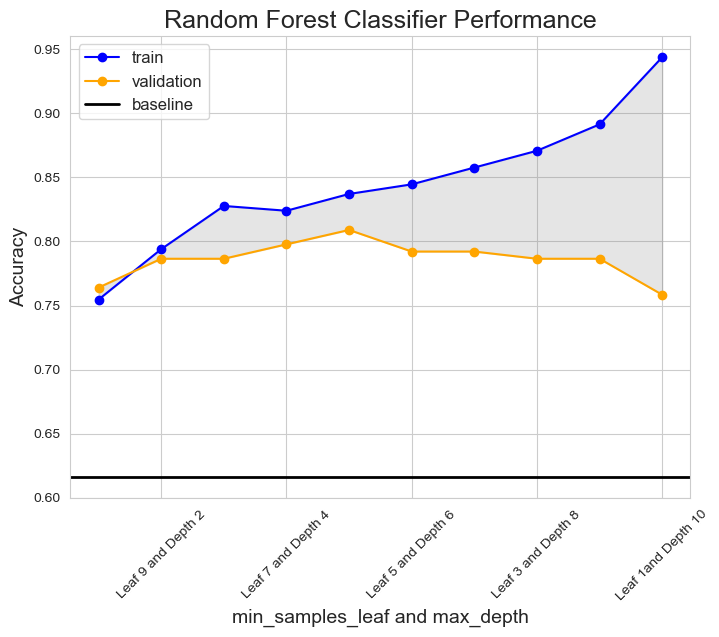

,min_samples_leaf,max_depth,train_score,validate_score,diff_score
0,1,10,0.943820,0.758427,0.185393
1,2,9,0.891386,0.786517,0.104869
2,3,8,0.870787,0.786517,0.084270
3,4,7,0.857678,0.792135,0.065543
4,5,6,0.844569,0.792135,0.052434
5,6,5,0.837079,0.808989,0.028090
6,7,4,0.823970,0.797753,0.026217
7,8,3,0.827715,0.786517,0.041199
8,9,2,0.794007,0.786517,0.007491
9,10,1,0.754682,0.764045,-0.009363


In [111]:
df = mod1.random_forest_scores(X_train, y_train, X_validate, y_validate)
df

# Do it again but with telco churn

In [49]:
telco = prep.prep_telco()
telco.T

csv file found and loaded


,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
payment_type_id,2,2,1,1,2,4,3,4,1,2,...,2,3,2,2,3,2,1,2,2,1
internet_service_type_id,1,1,2,2,2,1,2,2,1,1,...,3,2,2,2,3,1,2,1,1,1
contract_type_id,2,1,1,1,1,1,3,3,1,3,...,1,2,2,1,1,2,1,1,3,3
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No


In [50]:
df = prep.split_data(telco, 'churn')
df

(      payment_type_id  internet_service_type_id  contract_type_id customer_id  \
 5911                3                         1                 2  8319-QBEHW   
 2479                1                         3                 2  3547-LQRIK   
 5889                2                         1                 1  8280-MQRQN   
 6087                3                         1                 3  8626-PTQGE   
 785                 4                         2                 2  1142-IHLOO   
 ...               ...                       ...               ...         ...   
 6102                3                         2                 1  8642-GVWRF   
 356                 1                         1                 1  0523-VNGTF   
 1756                1                         2                 1  2568-BRGYX   
 2127                2                         1                 3  3057-VJJQE   
 3586                2                         1                 2  5081-NWSUP   
 
       gender 

In [51]:
train,validate,test = df
train.T

,5911,2479,5889,6087,785,3057,5757,3465,1539,3175,...,4998,2899,6358,1795,5269,6102,356,1756,2127,3586
payment_type_id,3,1,2,3,4,4,1,1,1,1,...,1,3,2,2,1,3,1,1,2,2
internet_service_type_id,1,3,1,1,2,2,2,2,2,2,...,2,1,3,3,2,2,1,2,1,1
contract_type_id,2,2,1,3,2,2,1,1,1,1,...,2,1,3,1,1,1,1,1,3,2
customer_id,8319-QBEHW,3547-LQRIK,8280-MQRQN,8626-PTQGE,1142-IHLOO,4374-YMUSQ,8098-LLAZX,4910-GMJOT,2250-IVBWA,4550-VBOFE,...,7025-IWFHT,4130-MZLCC,8999-EXMNO,2621-UDNLU,7426-WEIJX,8642-GVWRF,0523-VNGTF,2568-BRGYX,3057-VJJQE,5081-NWSUP
gender,Male,Female,Female,Male,Female,Male,Female,Female,Male,Male,...,Male,Female,Female,Female,Male,Female,Female,Male,Male,Female
senior_citizen,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
partner,No,Yes,No,No,No,No,No,No,Yes,Yes,...,No,No,Yes,Yes,Yes,Yes,No,No,No,No
dependents,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,Yes,No,Yes,No,No,No,No,No
tenure,26,47,1,69,51,34,4,1,64,70,...,41,5,19,3,60,2,52,4,35,10
phone_service,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes


In [52]:
train = train.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id','gender',
                           'senior_citizen','partner','dependents','phone_service','multiple_lines','online_security',
                           'online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing',
                           'churn', 'contract_type','internet_service_type','payment_type'])
validate = validate.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id','gender',
                           'senior_citizen','partner','dependents','phone_service','multiple_lines','online_security',
                           'online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing',
                           'churn', 'contract_type','internet_service_type','payment_type'])
test = test.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id','gender',
                           'senior_citizen','partner','dependents','phone_service','multiple_lines','online_security',
                           'online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing',
                           'churn', 'contract_type','internet_service_type','payment_type'])
train

,tenure,monthly_charges,total_charges,gender_encoded,senior_citizen_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
5911,26,39.95,1023.75,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2479,47,26.90,1250.85,0,0,1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
5889,1,50.45,50.45,0,0,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
6087,69,60.05,4176.70,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
785,51,87.55,4475.90,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,2,79.70,165.00,0,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0
356,52,50.50,2566.30,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
1756,4,70.20,237.95,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2127,35,55.25,1924.10,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
column_to_move = train.pop("churn_encoded")
train.insert(0, "churn_encoded", column_to_move)
train

,churn_encoded,tenure,monthly_charges,total_charges,gender_encoded,senior_citizen_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
5911,0,26,39.95,1023.75,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2479,0,47,26.90,1250.85,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
5889,1,1,50.45,50.45,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
6087,0,69,60.05,4176.70,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
785,0,51,87.55,4475.90,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,1,2,79.70,165.00,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
356,0,52,50.50,2566.30,0,1,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
1756,1,4,70.20,237.95,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2127,0,35,55.25,1924.10,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
column_to_move = validate.pop("churn_encoded")
validate.insert(0, "churn_encoded", column_to_move)
validate

,churn_encoded,tenure,monthly_charges,total_charges,gender_encoded,senior_citizen_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
3554,0,56,106.80,5914.40,0,0,0,0,1,1,...,0,1,0,1,0,0,0,1,0,1
2063,0,67,60.50,3870.00,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1737,1,17,76.45,1233.40,1,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
5894,0,45,24.65,1138.80,0,0,1,1,1,1,...,1,0,1,0,1,0,1,0,1,0
209,1,68,100.20,6851.65,0,1,1,0,1,1,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,1,14,100.20,1369.80,0,1,1,0,1,1,...,0,1,0,0,0,0,0,1,0,1
6540,1,13,74.40,896.75,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5765,0,72,106.30,7565.35,1,0,1,0,1,1,...,0,1,0,1,0,0,0,1,0,1
6959,0,34,67.65,2339.30,0,0,0,1,1,0,...,0,0,0,1,0,1,0,1,0,0


In [55]:
column_to_move = test.pop("churn_encoded")
test.insert(0, "churn_encoded", column_to_move)
test

,churn_encoded,tenure,monthly_charges,total_charges,gender_encoded,senior_citizen_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
3160,0,51,95.15,5000.05,0,0,1,1,1,1,...,0,0,0,0,0,1,0,1,0,0
1577,0,65,71.00,4386.20,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
6823,1,18,96.05,1740.70,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
3615,0,25,105.50,2686.05,1,0,0,0,1,1,...,0,0,0,1,0,1,0,1,0,1
882,1,4,88.85,372.45,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1,2,76.40,160.80,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
6441,1,1,45.70,45.70,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5985,0,67,25.60,1790.35,0,0,0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
2452,0,72,38.50,2763.00,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [56]:
X_train = train.iloc[:,1:]
X_validate = validate.iloc[:,1:]
X_test = test.iloc[:,1:]
X_train

,tenure,monthly_charges,total_charges,gender_encoded,senior_citizen_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,contract_type_One year,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
5911,26,39.95,1023.75,1,0,0,1,0,1,1,...,0,1,0,0,0,0,0,1,0,0
2479,47,26.90,1250.85,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
5889,1,50.45,50.45,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6087,69,60.05,4176.70,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
785,51,87.55,4475.90,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,2,79.70,165.00,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
356,52,50.50,2566.30,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
1756,4,70.20,237.95,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2127,35,55.25,1924.10,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
target = 'churn_encoded'
y_train = train[target]
y_validate = validate[target]
y_test = test[target]

In [58]:
train.churn_encoded.value_counts()

0    3104
1    1121
Name: churn_encoded, dtype: int64

In [59]:
baseline_accuracy = 3104/(3104+1121)
baseline_accuracy

0.7346745562130178

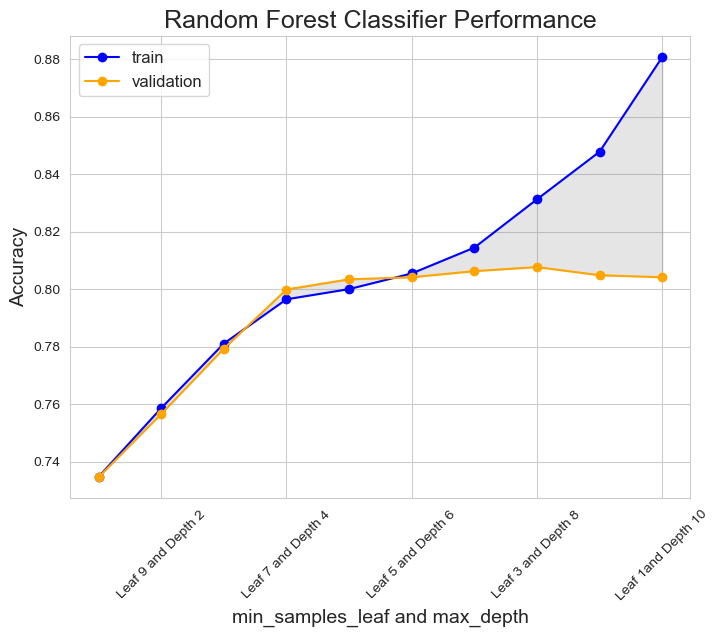

,min_samples_leaf,max_depth,train_score,validate_score,diff_score
0,1,10,0.880710,0.804116,0.076594
1,2,9,0.847811,0.804826,0.042985
2,3,8,0.831243,0.807665,0.023578
3,4,7,0.814438,0.806246,0.008192
4,5,6,0.805444,0.804116,0.001327
5,6,5,0.800000,0.803407,-0.003407
6,7,4,0.796450,0.799858,-0.003408
7,8,3,0.781065,0.779276,0.001789
8,9,2,0.758580,0.756565,0.002015
9,10,1,0.734675,0.734564,0.000111


In [60]:
df = mod.random_forest_scores(X_train, y_train, X_validate, y_validate)
df


The baseline accuracy is 0.73


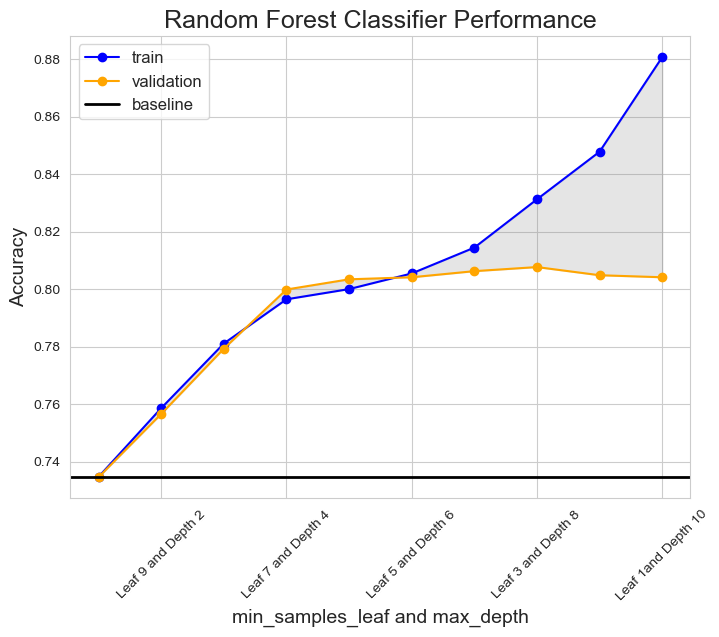

,min_samples_leaf,max_depth,train_score,validate_score,diff_score
0,1,10,0.880710,0.804116,0.076594
1,2,9,0.847811,0.804826,0.042985
2,3,8,0.831243,0.807665,0.023578
3,4,7,0.814438,0.806246,0.008192
4,5,6,0.805444,0.804116,0.001327
5,6,5,0.800000,0.803407,-0.003407
6,7,4,0.796450,0.799858,-0.003408
7,8,3,0.781065,0.779276,0.001789
8,9,2,0.758580,0.756565,0.002015
9,10,1,0.734675,0.734564,0.000111


In [61]:
df = mod1.random_forest_scores(X_train, y_train, X_validate, y_validate)
df